# Data Visualization


Here, I develop build attractive plots with the in-built pandas `.plot()` API.
Tasks:

- Load data from cities.json into a data frame,
- Create a bar plot showing how many of the top 1,000 cities are in each state. Order the plot from smallest (on the left) to greatest.
- Create a bar plot showing growth in Pennsylvania cities, sorted from lowest (on the left)
to highest.
- Create a pie plot from all Massachusetts cities, so that we can see the proportion that each
city contributes to the overall population.
- Create a scatter plot of the cities, with x being longitude and y latitude. What does the
resulting plot look like?

In [162]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import numpy as np
from glob import glob
import os
import seaborn as sns

In [51]:
from re import I


cities_url = 'data/cities.json'


cities_df = pd.read_json(cities_url)





cities_df.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


<AxesSubplot:ylabel='state'>

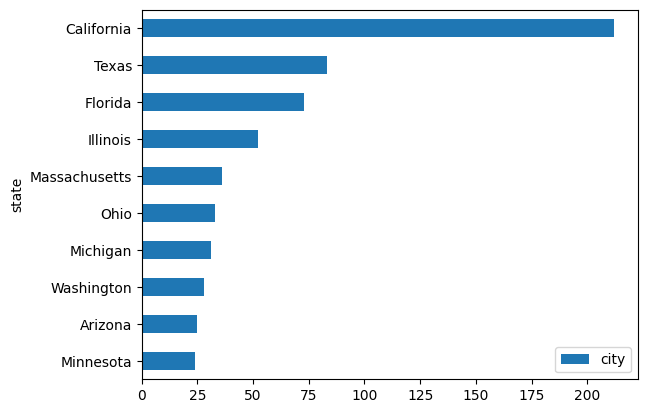

In [52]:
(
    cities_df
    # Group by the state
    .groupby('state')
    # Count the number of Cities per state
    [['city']].count()
    # Sort the values
    .sort_values(by='city', ascending=False)
    # Select the top 10 states
    [:10]
    # Now lets plot the details
    .sort_values(by='city', ascending=True)
    .plot.barh()
)

<AxesSubplot:ylabel='city'>

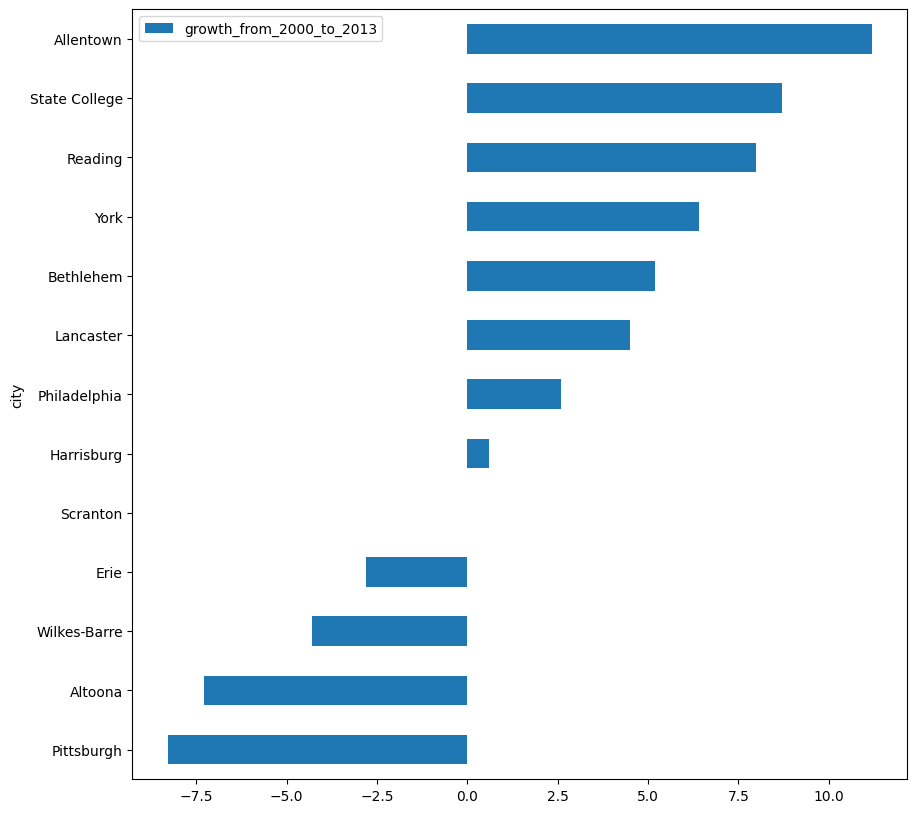

In [53]:
# create a bar plot showing growth in Pennsylvania cities, sorted from lowest to highest

(
    cities_df
    # Select Pennsylvania Cities
    .loc[(cities_df['state'] == 'Pennsylvania'), ['city', 'growth_from_2000_to_2013']]
    # Remove the '%' sign from growth column
    .assign(growth_from_2000_to_2013=lambda df_: (
                                                    df_['growth_from_2000_to_2013'].str.replace('%','')
                                                    .astype(np.float16)
                                                  ))
    # Sort the values
    .sort_values(by='growth_from_2000_to_2013')
    # Set the index to city
    .set_index('city')
    # Now lets plot
    .plot.barh(figsize=(10,10))
)

<AxesSubplot:ylabel='population'>

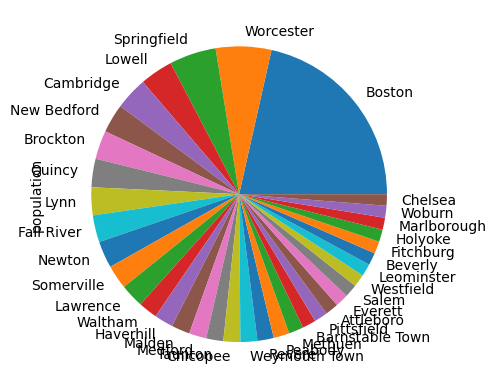

In [54]:
# find all of the cities in Massachusetts, and to create a pie plot with all of these cities

(
    cities_df
    # Select Massachusetts' records
    .loc[(cities_df['state'] == 'Massachusetts'), ['city', 'population']]
    # Set the index to city
    .set_index('city')
    # Plot a pie chart
    ['population'].plot.pie()
)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

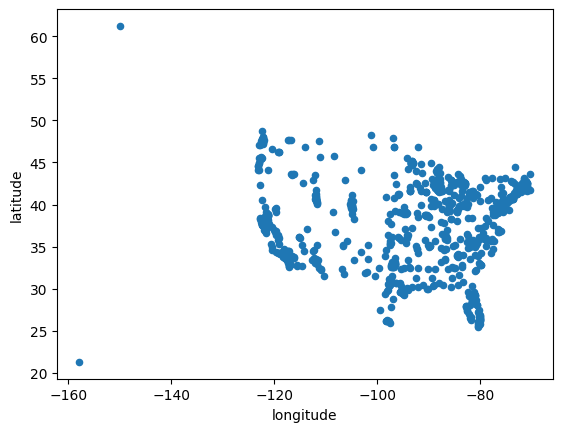

In [55]:
# Create a scatter plot with the longitude and latitude of the 1,000 cities in the data frame.

(
    cities_df
    # Scatterplot
    .plot.scatter(x='longitude', y='latitude')
    
)

<AxesSubplot:ylabel='Frequency'>

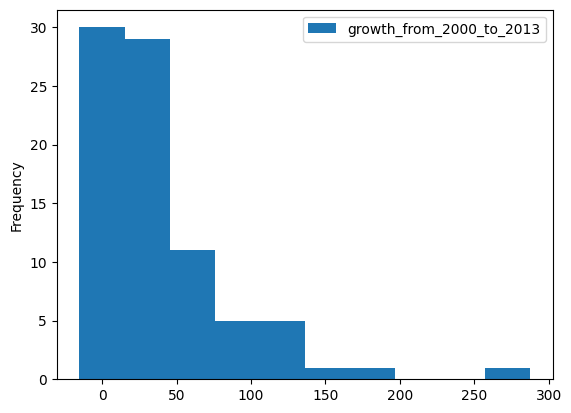

In [56]:
(
    cities_df
    # Select Pennsylvania Cities
    .loc[(cities_df['state'] == 'Texas'), ['growth_from_2000_to_2013']]
    # Remove the '%' sign from growth column
    .assign(growth_from_2000_to_2013=lambda df_: (
                                                    df_['growth_from_2000_to_2013'].str.replace('%','')
                                                    .astype(np.float16)
                                                  ))
    .plot.hist()
)

### Boxplotting Weather 

Tasks:

- Load the weather data for Chicago. We only care about three columns: date_time, min
temp, and max temp. Make date_time the index, and set the names of the min and max
temp columns to "mintemp" and "maxtemp".
- Create a boxplot of Chicago’s minimum temperatures during this period.
- Find the values that are represented as dots on that boxplot
- Create a boxplot of Chicago’s minimum temperatures in February.
- Create a side-by-side boxplot of Chicago’s minimum and temperatures in February and March
- Now read data from Los Angeles and Boston in, as well. Create a single data frame with
data from all three cities, along with a new "city" column containing the name of the city.
- Get descriptive statistics for mintemp and maxtemp, grouped by city
- Create side-by-side boxplots, showing minimum and maximum temperatures for each
three cities

In [57]:
import pandas as pd
import numpy as np
import matplotlib

In [58]:
chicago_data_url = 'data/chicago,il.csv'

chicago_df = pd.read_csv(chicago_data_url, usecols=[0, 1,2], names=["date_time", "maxtempC", "mintempC"],
                         header=0, parse_dates = ['date_time'], index_col=['date_time']
                         )

chicago_df['city'] = 'chicago'

chicago_df.head()

,maxtempC,mintempC,city
date_time,,,
2018-12-11 00:00:00,1,-2,chicago
2018-12-11 03:00:00,1,-2,chicago
2018-12-11 06:00:00,1,-2,chicago
2018-12-11 09:00:00,1,-2,chicago
2018-12-11 12:00:00,1,-2,chicago


In [59]:
# What is the size of the dataset

chicago_df.shape

(728, 3)

In [60]:
# Look at the description

chicago_df.describe()

,maxtempC,mintempC
count,728.000000,728.000000
mean,-0.736264,-5.076923
std,6.128985,6.255857
min,-25.000000,-28.000000
25%,-3.000000,-9.000000
50%,0.000000,-4.000000
75%,3.000000,-1.000000
max,9.000000,6.000000


<AxesSubplot:>

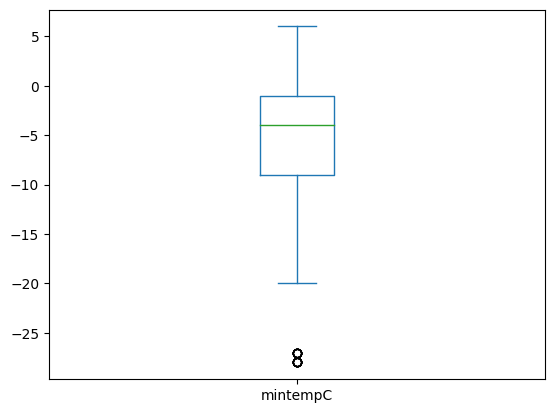

In [61]:
# Creating Box plots

(
    chicago_df
    # Create a boxplot of min temp
    ['mintempC'].plot.box()
)

<AxesSubplot:>

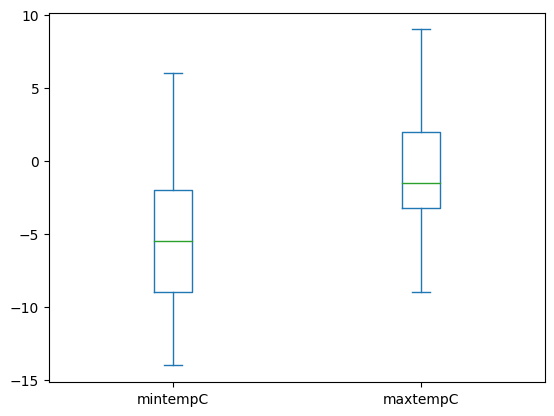

In [62]:
# Box plot of temperatures in February

(
    chicago_df
    # Select the Feburary Temps
    .loc['01-Feb-2019':'28-Feb-2019', ['mintempC', 'maxtempC']]
    # Get the boxplot
    .plot.box()
)

In [63]:
boston_url = 'data/boston,ma.csv'

la_url = 'data/los+angeles,ca.csv'

weather_df = chicago_df

for url in [boston_url, la_url]:
    df = pd.read_csv(url, usecols=[0, 1,2], names=["date_time", "maxtempC", "mintempC"],
                         header=0, parse_dates = ['date_time'], index_col=['date_time'])
    
    if 'boston' in url:
        df['city'] = 'boston'
        
    elif 'los' in la_url:
        df['city'] = 'los_angeles'
    
    # Update the weather data       
    weather_df = pd.concat([weather_df, df], axis=0)


weather_df.head()

,maxtempC,mintempC,city
date_time,,,
2018-12-11 00:00:00,1,-2,chicago
2018-12-11 03:00:00,1,-2,chicago
2018-12-11 06:00:00,1,-2,chicago
2018-12-11 09:00:00,1,-2,chicago
2018-12-11 12:00:00,1,-2,chicago


In [64]:
weather_df['city'].value_counts()

chicago        728
boston         728
los_angeles    728
Name: city, dtype: int64

In [65]:
# Lets describe the data

(
    weather_df
    # Group by the city
    .groupby('city')
    # Select the min and max temps
    [['maxtempC', 'mintempC']]
    # Select describe the data
    .describe()
)

maxtempC                                                     \
               count       mean       std   min   25%   50%   75%   max   
city                                                                      
boston         728.0   2.868132  4.945277 -12.0   0.0   2.0   6.0  17.0   
chicago        728.0  -0.736264  6.128985 -25.0  -3.0   0.0   3.0   9.0   
los_angeles    728.0  17.054945  2.708640  12.0  15.0  16.0  19.0  23.0   

            mintempC                                                    
               count       mean       std   min  25%   50%   75%   max  
city                                                                    
boston         728.0  -3.142857  4.957195 -14.0 -6.0  -3.0   0.0   9.0  
chicago        728.0  -5.076923  6.255857 -28.0 -9.0  -4.0  -1.0   6.0  
los_angeles    728.0  10.637363  2.705200   4.0  9.0  11.0  12.0  17.0

maxtempC       AxesSubplot(0.125,0.11;0.352273x0.77)
mintempC    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

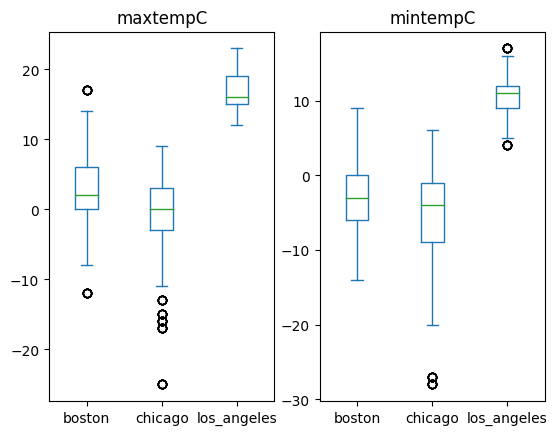

In [66]:
(
    weather_df
    # Create a boxplot describing max and min temps
    .plot.box(column=['maxtempC', 'mintempC'], by='city')
)

array([<AxesSubplot:xlabel='date_time'>, <AxesSubplot:xlabel='date_time'>,
       <AxesSubplot:xlabel='date_time'>], dtype=object)

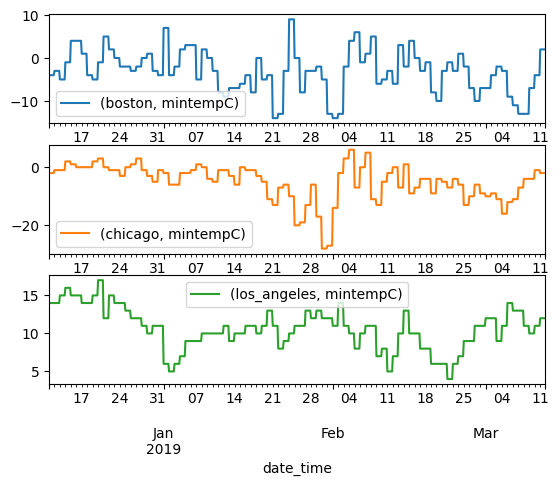

In [67]:
# Line plot of minimum temps
(
    weather_df
    # Select the minimum temp and city columns 
    [['mintempC', 'city']]
    # line plot showing minimum temps
    .plot.line(by='city')
)

## Taxi fare breakdown


- Load data from all four NYC taxi files into a single data frame. We’ll need a bunch of
different columns: 'tpep_pickup_datetime', 'passenger_count', 'trip_distance',
'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
'improvement_surcharge','total_amount', and 'congestion_surcharge'.
- Create a bar plot showing how many rides took place during each month and year of our
data set. (It’s fine if there are "holes" in the bar plot.)
- Create a bar plot showing the total amount paid in taxi rides for every year and month of
our data set.
- Create a bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount
paid in taxi rides, per month + year—with the various components stacked in a single bar
per year/month.
- Create a bar plot showing fare_amount, extra, mta_tax, tip_amount, and tolls_amount
paid in taxi rides, per number of passengers, stacked in a single bar per number of
passengers.
- Create a histogram showing the frequency of each tipping percentage between (and
including) 0% and 50%

In [68]:
data_path = os.path.join('data/nyc_taxi*')

taxi_fare = []

for data_path in glob(data_path):
    # Read the dataset
    df = pd.read_csv(data_path, usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                                        'fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                        'improvement_surcharge','total_amount','congestion_surcharge'],
                                        parse_dates=['tpep_pickup_datetime']).sample(25000)
    # Append to the taxi_fare list
    taxi_fare.append(df)

    
# Create the new df
taxi_fare_df = pd.concat(taxi_fare)

# Preview the data
taxi_fare_df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
977064,2019-01-05 15:37:08,1.0,1.50,8.5,0.0,0.5,1.85,0.0,0.3,11.15,NaN
6417273,2019-01-27 02:12:55,1.0,1.07,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
2099032,2019-01-10 11:46:54,1.0,0.63,6.0,0.0,0.5,0.00,0.0,0.3,6.80,NaN
5708252,2019-01-24 16:54:18,1.0,3.20,18.0,1.0,0.5,3.95,0.0,0.3,23.75,0.0
4811476,2019-01-20 20:14:54,1.0,0.60,5.5,0.0,0.5,0.00,0.0,0.3,6.30,NaN


<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

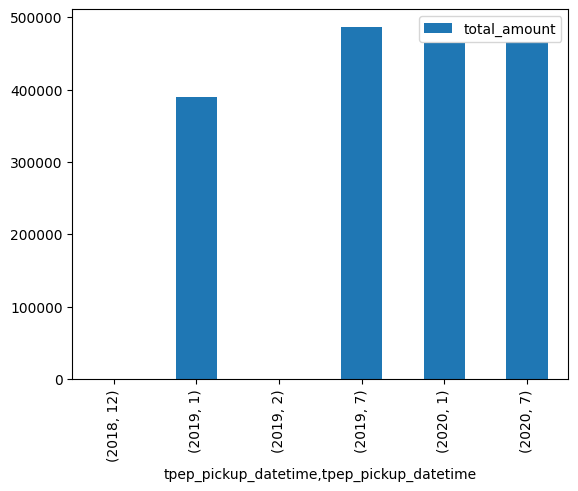

In [69]:
# bar plot showing how many rides there were in each year and month

(
    taxi_fare_df
    # Groupby the year and Month
    .groupby([taxi_fare_df['tpep_pickup_datetime'].dt.year,
              taxi_fare_df['tpep_pickup_datetime'].dt.month
              ])
    # Count the records in each group
    [['total_amount']].sum()
    # Bar plot if the number of rides
    .plot.bar()
        
)

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

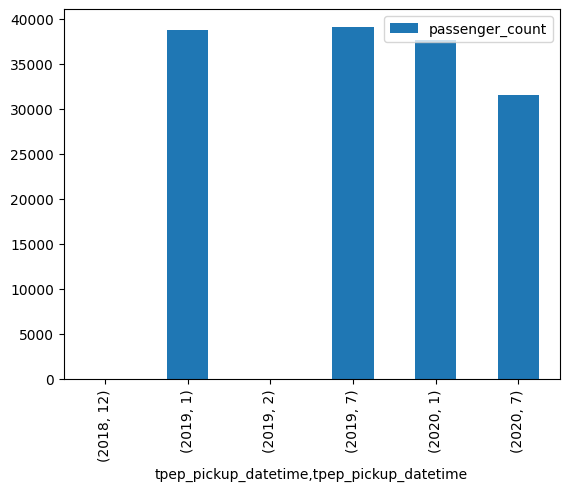

In [70]:
(
    taxi_fare_df
    # Groupby the year and Month
    .groupby([taxi_fare_df['tpep_pickup_datetime'].dt.year,
              taxi_fare_df['tpep_pickup_datetime'].dt.month
              ])
    # Count the records in each group
    [['passenger_count']].sum()
    # Bar plot if the number of rides
    .plot.bar()
        
)

> create plot not only the amount of revenue that
we got each month in the data set, but to break that bar down into segments, thus allowing us to
see how much of each month’s revenue came from each source.

<AxesSubplot:xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

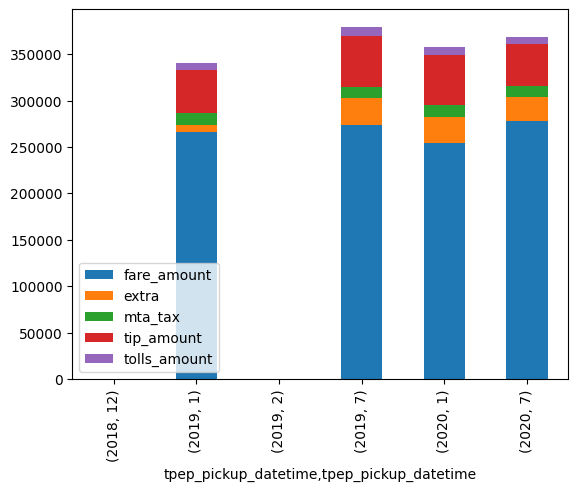

In [71]:
(
    taxi_fare_df
    # Groupby the year and Month
    .groupby([taxi_fare_df['tpep_pickup_datetime'].dt.year,
              taxi_fare_df['tpep_pickup_datetime'].dt.month
              ])
    # Sum the records in each group
    [['fare_amount','extra','mta_tax','tip_amount', 'tolls_amount']].sum()
    # Find the actual fair
    .assign(fare_amount= lambda df_: (
                                    df_['fare_amount'] - (df_['extra'] + df_['mta_tax'] + df_['mta_tax'] + df_['tolls_amount'])
                                    ))
    # A stacked bar plot showing the component of the fair
    .plot.bar(stacked=True)
)

<AxesSubplot:ylabel='Frequency'>

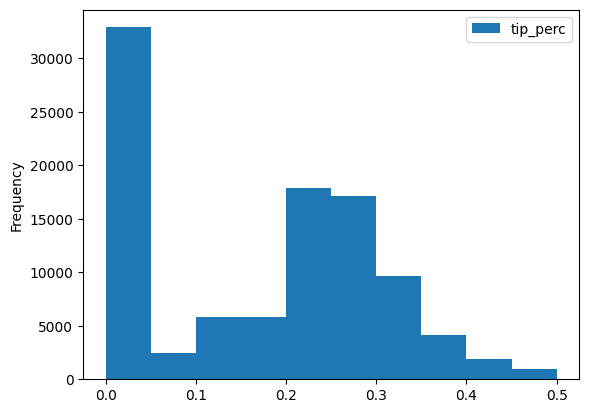

In [88]:
# histogram showing the frequency of each tipping percentage between (and including) 0 and 50
(
    taxi_fare_df
    # Select the trips with fare amount > 0
    .query('fare_amount > 0')
    # Calculate the trip percentage using the current df
    .assign(tip_perc = (lambda df_: df_['tip_amount'].div(df_['fare_amount'])))
    # Select the tip_perc column for the current df
    .loc[(lambda df_: df_['tip_perc'].le(0.5) ) , ['tip_perc']]
    # Plot a histogram
    .plot.hist()
)


In [91]:
data_path = os.path.join('data/nyc_taxi_2020*')


all_df = []


for path in glob(data_path):
    # Load the dataset
    df = pd.read_csv(path, usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount'])
    # Append to the all_df list
    all_df.append(df)
    
    
    
cities_df = pd.concat(all_df, axis=0)

# Preview the data
cities_df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
0,2020-01-01 00:28:15,1.0,1.2,11.27
1,2020-01-01 00:35:39,1.0,1.2,12.30
2,2020-01-01 00:47:41,1.0,0.6,10.80
3,2020-01-01 00:55:23,1.0,0.8,8.16
4,2020-01-01 00:01:58,1.0,0.0,4.80


In [116]:
new_df = (
    cities_df
    # Adding new columns of month and year
    .assign(year= pd.to_datetime(cities_df['tpep_pickup_datetime']).dt.year,
            month= pd.to_datetime(cities_df['tpep_pickup_datetime']).dt.month,
            day= pd.to_datetime(cities_df['tpep_pickup_datetime']).dt.day
            )
    # Ensure that all data is 2020 and for Jan and Jul for current df
    .loc[(lambda df_: (df_['year'] == 2020) & (df_['month'].isin([1, 7])))]
    # Reset the index to make unique
    .reset_index(drop=True)
    # Take a 1% sample of the df
    .sample(frac=0.01)
        )

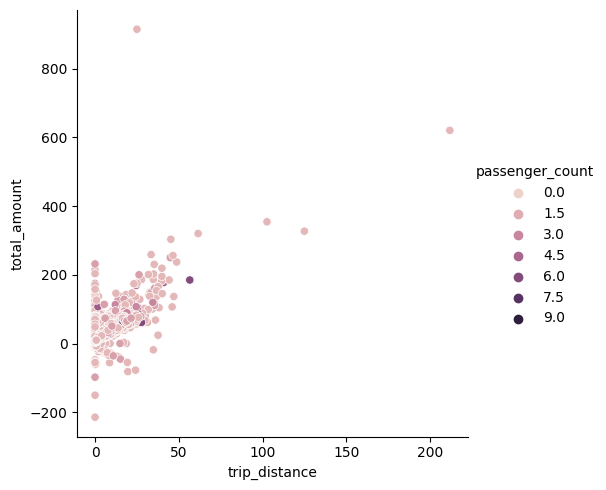

In [110]:
# create a scatter plot comparing trip_distance (x axis) with total_amount (y axis)

(
    sns.relplot(x='trip_distance', y='total_amount', data=new_df, 
                hue='passenger_count')
)

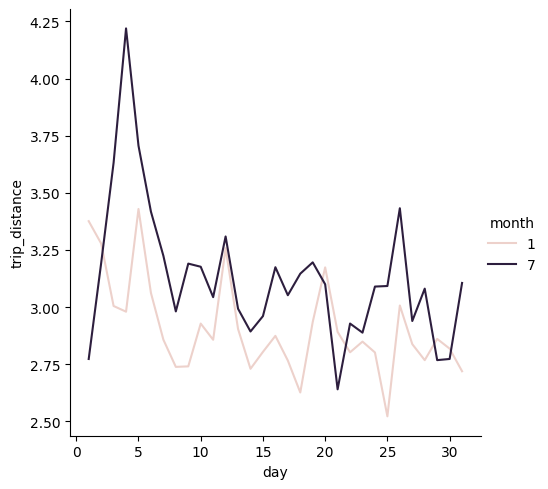

In [120]:


sns.relplot(x='day', y='trip_distance', kind='line', data=new_df, hue='month', ci=None)

In [125]:
month_day_df = (
    new_df
    # Group by the month and day columns and count this
    .groupby(['month', 'day'])
    # Count the records in these groups
    [['year']].count()
    # Reset the index 
    .reset_index()
               )

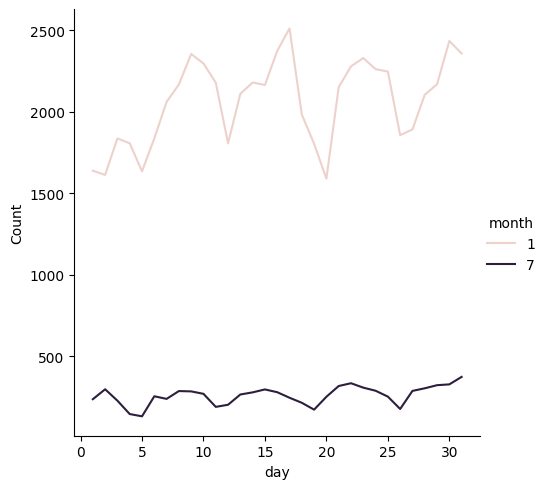

In [130]:
daily_count_plot = sns.relplot(x='day', y='year', hue='month', kind='line', data=month_day_df, ci=None)
# Set the labels
daily_count_plot.set_ylabels('Count')

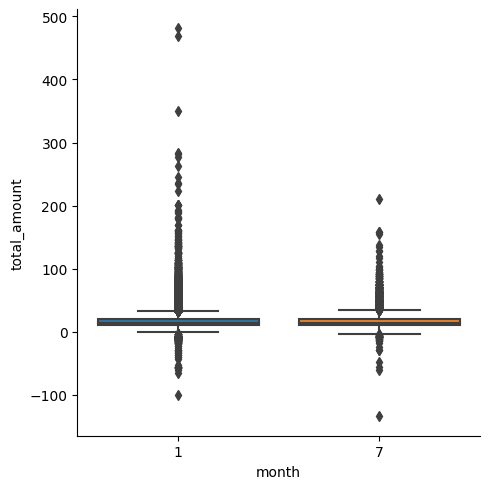

In [133]:
# Boxplot with Seaborn
sns.catplot(x='month', y='total_amount', data=new_df, kind='box')

### Cars, Oil, and Ice Cream

In this exercise, we’re going to try to answer a question that has probably occurred to you on
many occasions: When the price of oil goes up, do people drive more or less in their cars? And
while we’re at it, we’ll also try to answer another question, namely whether the price of ice
cream is correlated with the price of oil.

In [134]:
oil_data_url = 'data/wti-daily.csv'

oil_df = pd.read_csv(oil_data_url, parse_dates=[0], header=0, index_col=0, names=['date', 'oil'])

oil_df.head()

,oil
date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [136]:
ice_cream_url = 'data/ice-cream.csv'

ice_cream_df = pd.read_csv(ice_cream_url, header=0, parse_dates=[0], index_col=0, names=['date', 'icecream'])

ice_cream_df.head()

,icecream
date,
1980-01-01,1.755
1980-02-01,1.775
1980-03-01,1.718
1980-04-01,1.769
1980-05-01,1.822


In [154]:
# The ice cream is an object, because 1 record contains an entry with only '.'

cleaned_icecream_df = (
    ice_cream_df
    # Select all the records that contain digits
    .loc[(ice_cream_df['icecream'].str.contains(r'[0-9]'))]
    # Convert the ice_cream coluumn to float
    [['icecream']].astype(np.float64)
)

In [155]:
miles_file_path = 'data/miles-traveled.csv'


miles_df = pd.read_csv(miles_file_path, header=0, parse_dates=[0], index_col=0, names=['date', 'miles'])


miles_df.head() 

,miles
date,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


In [158]:
# Joining the 3 dataframes

df = (
    # Join the oil and icecream df by the index using the inner joins
    oil_df.join(cleaned_icecream_df, how='inner')
    # Next join to the miles_df
    .join(miles_df, how='inner')
   )

df.head()

,oil,icecream,miles
date,,,
1986-04-01,11.13,2.382,150277.0
1986-05-01,13.80,2.368,160459.0
1986-07-01,12.39,2.369,171114.0
1986-08-01,11.56,2.319,173977.0
1986-10-01,15.23,2.377,159434.0


In [159]:
# Lets ge the correlation matrix

df.corr()

,oil,icecream,miles
oil,1.000000,0.777347,0.645250
icecream,0.777347,1.000000,0.818383
miles,0.645250,0.818383,1.000000


<AxesSubplot:xlabel='oil', ylabel='icecream'>

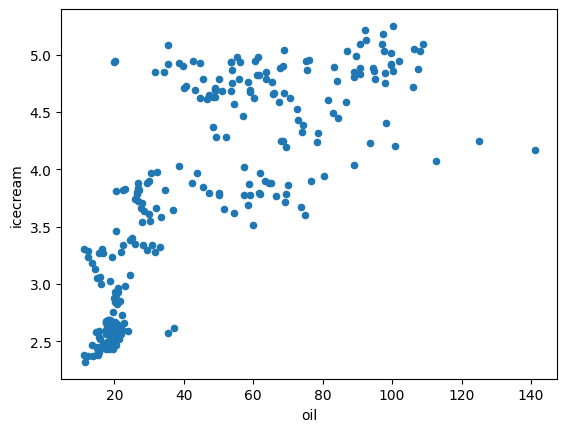

In [160]:
# Scatterplot of icecream vs oil

(
    df
    .plot.scatter(x='oil', y='icecream')
)

<AxesSubplot:xlabel='oil', ylabel='miles'>

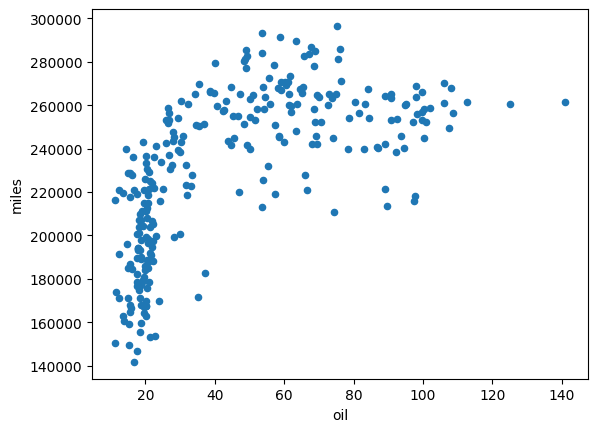

In [161]:
# Scatterplot of oil vs miles

(
    df
    .plot.scatter(x='oil', y='miles')
)

array([[<AxesSubplot:xlabel='oil', ylabel='oil'>,
        <AxesSubplot:xlabel='icecream', ylabel='oil'>,
        <AxesSubplot:xlabel='miles', ylabel='oil'>],
       [<AxesSubplot:xlabel='oil', ylabel='icecream'>,
        <AxesSubplot:xlabel='icecream', ylabel='icecream'>,
        <AxesSubplot:xlabel='miles', ylabel='icecream'>],
       [<AxesSubplot:xlabel='oil', ylabel='miles'>,
        <AxesSubplot:xlabel='icecream', ylabel='miles'>,
        <AxesSubplot:xlabel='miles', ylabel='miles'>]], dtype=object)

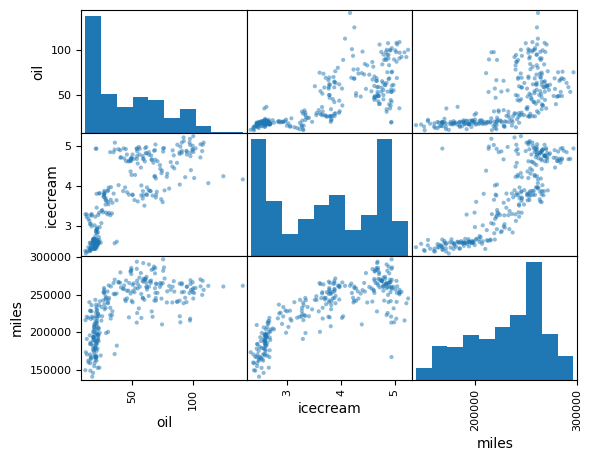

In [163]:
# Plot a scatterplot matrix
scatter_matrix(df)